In [29]:
import pandas as pd 
import numpy as np
import bamboolib as bam 
import seaborn as sb
from sklearn.metrics import *


In [30]:
df = pd.read_csv("C:\\Users\\Radhika\\Downloads\\week 4 - Nashville_housing_data.csv")

In [31]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [32]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [33]:
#Checking for Null Columns
nullValueColumnNames = df.columns[df.isna().any()].tolist()
nullValueColumnNames

#Percentage of missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
import pandas as pd; import numpy as np
missing_value_df = missing_value_df.reset_index()
missing_value_df

                                index                        column_name  \
0                          Unnamed: 0                         Unnamed: 0   
1                           Parcel ID                          Parcel ID   
2                            Land Use                           Land Use   
3                    Property Address                   Property Address   
4                    Suite/ Condo   #                   Suite/ Condo   #   
5                       Property City                      Property City   
6                           Sale Date                          Sale Date   
7                     Legal Reference                    Legal Reference   
8                      Sold As Vacant                     Sold As Vacant   
9   Multiple Parcels Involved in Sale  Multiple Parcels Involved in Sale   
10                               City                               City   
11                              State                              State   
12          

In [34]:
#Add the new columns names
df.columns = ['Unnamed','Parcel_ID','Land_Use','Property_Address','Suite_Condo','Property_City','Sale_Date','Legal_Reference','Sold_As_Vacant','Multiple_Parcels_Sale','City'
          ,'State','Acreage','Tax_District','Neighborhood','Land_Value','Building_Value','Finished_Area','Foundation_Type','Year_Built','Exterior_Wall','Grade','Bedrooms','Full_Bath','Half_Bath','Sale_Price']

In [35]:
#Dropping columns
df = df.drop(['Property_Address', 'Property_City', 'Unnamed', 'Sale_Date', 'Parcel_ID', 'Legal_Reference'],  axis=1)

In [36]:
df.isnull().sum()

Land_Use                     0
Suite_Condo              22651
Sold_As_Vacant               0
Multiple_Parcels_Sale        0
City                         0
State                        0
Acreage                      0
Tax_District                 0
Neighborhood                 0
Land_Value                   0
Building_Value               0
Finished_Area                1
Foundation_Type              1
Year_Built                   0
Exterior_Wall                0
Grade                        0
Bedrooms                     3
Full_Bath                    1
Half_Bath                  108
Sale_Price                   0
dtype: int64

In [37]:
df= df.drop('Suite_Condo', axis = 1)

In [38]:
#dropping nan values 
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

Land_Use                 0
Sold_As_Vacant           0
Multiple_Parcels_Sale    0
City                     0
State                    0
Acreage                  0
Tax_District             0
Neighborhood             0
Land_Value               0
Building_Value           0
Finished_Area            0
Foundation_Type          0
Year_Built               0
Exterior_Wall            0
Grade                    0
Bedrooms                 0
Full_Bath                0
Half_Bath                0
Sale_Price               0
dtype: int64

In [39]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df['Land_Use']= label.fit_transform(df['Land_Use'])
df['Sold_As_Vacant']= label.fit_transform(df['Sold_As_Vacant']) 
df['Multiple_Parcels_Sale']= label.fit_transform(df['Multiple_Parcels_Sale']) 
df['Tax_District']= label.fit_transform(df['Tax_District']) 
df['Foundation_Type']= label.fit_transform(df['Foundation_Type']) 
df['Exterior_Wall']= label.fit_transform(df['Exterior_Wall'])
df['Grade']= label.fit_transform(df['Grade'])
df['Sale_Price']= label.fit_transform(df['Sale_Price']) 
print(df['Land_Use'].unique())
print(df['Sold_As_Vacant'].unique()) 
print(df['Multiple_Parcels_Sale'].unique()) 
print(df['Tax_District'].unique())
print(df['Foundation_Type'].unique())
print(df['Exterior_Wall'].unique())
print(df['Grade'].unique())
print(df['Sale_Price'].unique())

[3 0 2 1]
[0 1]
[0 1]
[6 1 5 0 4 2 3]
[3 4 1 0 2 5]
[0 1 3 4 7 8 2 5 6]
[2 1 3 0 7 4 6 5]
[0 1]


In [40]:
df.dtypes

Land_Use                   int32
Sold_As_Vacant             int32
Multiple_Parcels_Sale      int32
City                      object
State                     object
Acreage                  float64
Tax_District               int32
Neighborhood               int64
Land_Value                 int64
Building_Value             int64
Finished_Area            float64
Foundation_Type            int32
Year_Built                 int64
Exterior_Wall              int32
Grade                      int32
Bedrooms                 float64
Full_Bath                float64
Half_Bath                float64
Sale_Price                 int32
dtype: object

In [41]:
df

       Land_Use  Sold_As_Vacant  Multiple_Parcels_Sale       City State  \
0             3               0                      0  NASHVILLE    TN   
1             3               0                      0  NASHVILLE    TN   
2             3               0                      0  NASHVILLE    TN   
3             3               0                      0  NASHVILLE    TN   
4             3               0                      0  NASHVILLE    TN   
...         ...             ...                    ...        ...   ...   
22646         3               0                      0    ANTIOCH    TN   
22647         3               0                      0    ANTIOCH    TN   
22648         3               0                      0    ANTIOCH    TN   
22649         3               0                      0  NASHVILLE    TN   
22650         3               0                      0  NASHVILLE    TN   

       Acreage  Tax_District  Neighborhood  Land_Value  Building_Value  \
0         0.17           

In [42]:
df = df[df.Year_Built > 1900]

In [43]:
df

       Land_Use  Sold_As_Vacant  Multiple_Parcels_Sale       City State  \
0             3               0                      0  NASHVILLE    TN   
1             3               0                      0  NASHVILLE    TN   
2             3               0                      0  NASHVILLE    TN   
3             3               0                      0  NASHVILLE    TN   
4             3               0                      0  NASHVILLE    TN   
...         ...             ...                    ...        ...   ...   
22646         3               0                      0    ANTIOCH    TN   
22647         3               0                      0    ANTIOCH    TN   
22648         3               0                      0    ANTIOCH    TN   
22649         3               0                      0  NASHVILLE    TN   
22650         3               0                      0  NASHVILLE    TN   

       Acreage  Tax_District  Neighborhood  Land_Value  Building_Value  \
0         0.17           

In [44]:
df.duplicated().sum()

1450

In [45]:
df = df.drop_duplicates(keep= 'first')

In [46]:

#Drop columns
df = df.drop(columns=['State', 'City'])

#  Drop columns
df = df.drop(columns=['Unnamed: 0', 'Parcel ID', 'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference'])



KeyError: "['Unnamed: 0', 'Parcel ID', 'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference'] not found in axis"

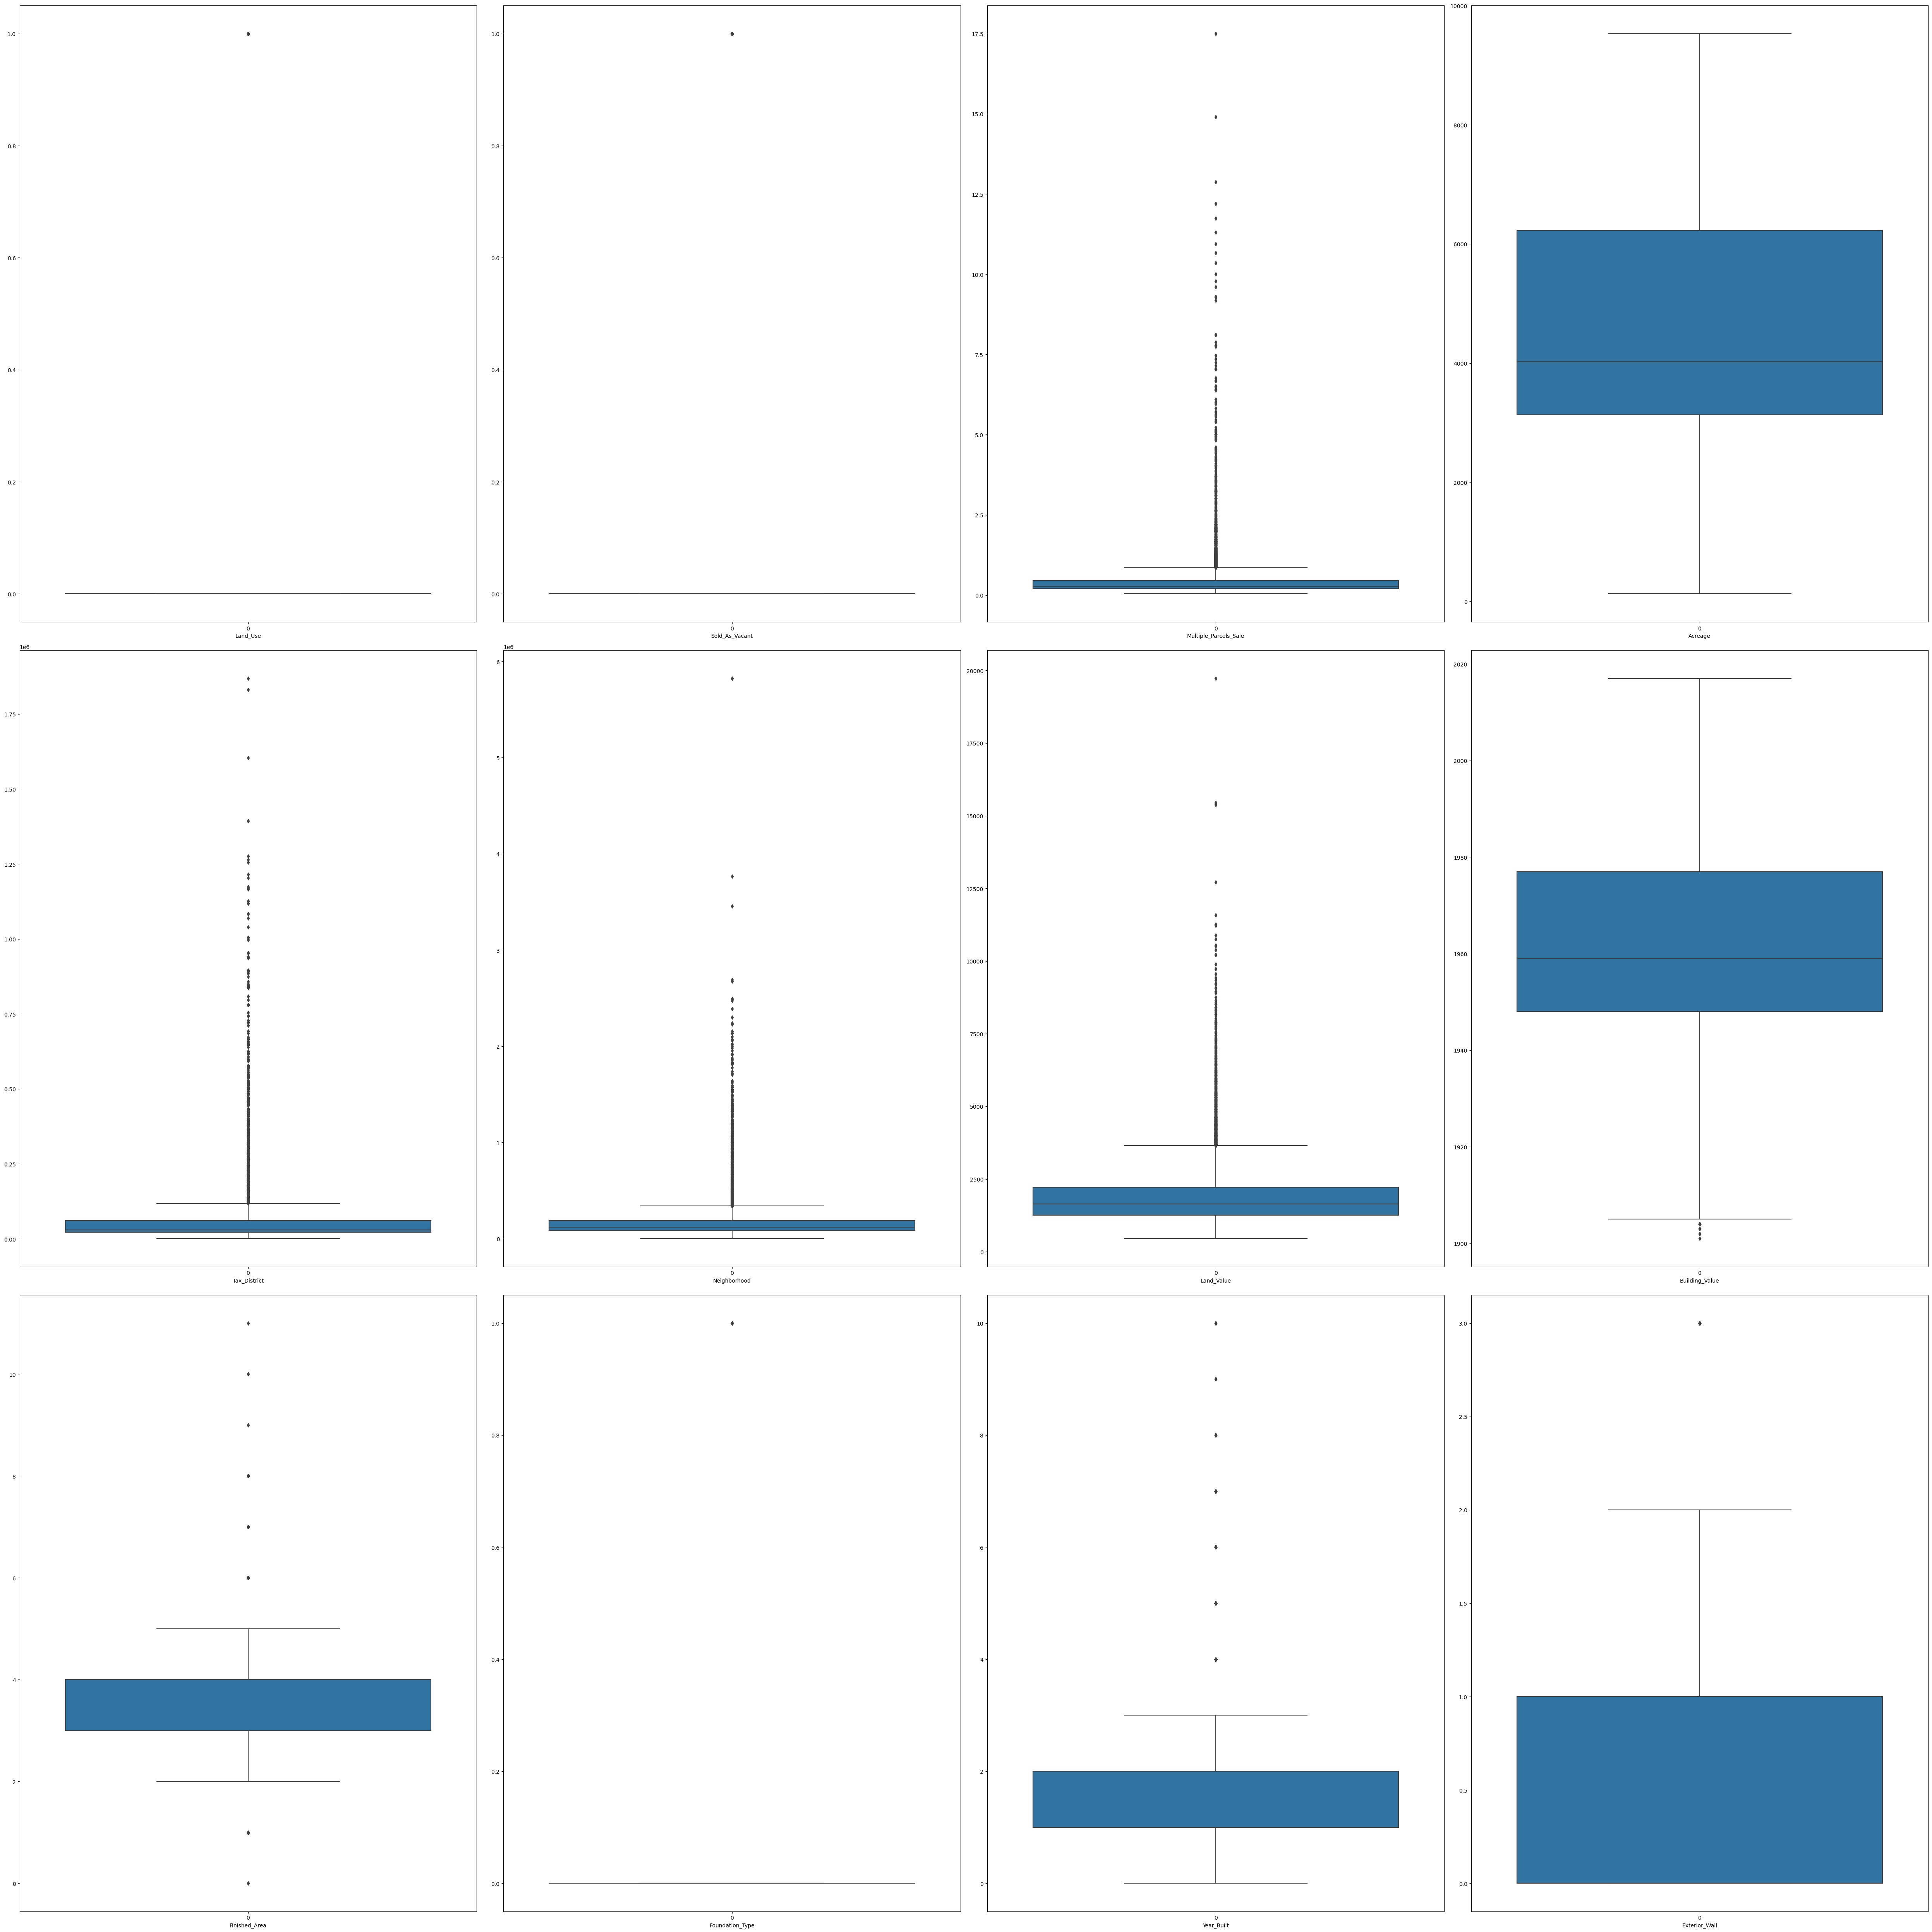

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(50,50))

plot1 = sns.boxplot(data=df['Sold_As_Vacant'], ax=axs[0][0])
plot2 = sns.boxplot(data=df['Multiple_Parcels_Sale'], ax=axs[0][1])
plot3 = sns.boxplot(data=df['Acreage'], ax=axs[0][2])
plot4 = sns.boxplot(data=df['Neighborhood'], ax=axs[0][3])

plot5 = sns.boxplot(data=df['Land_Value'], ax=axs[1][0])
plot6 = sns.boxplot(data=df['Building_Value'], ax=axs[1][1])
plot7 = sns.boxplot(data=df['Finished_Area'], ax=axs[1][2])
plot8 = sns.boxplot(data=df['Year_Built'], ax=axs[1][3])

plot9 = sns.boxplot(data=df['Bedrooms'], ax=axs[2][0])
plot10 = sns.boxplot(data=df['Sale_Price'], ax=axs[2][1])
plot11 = sns.boxplot(data=df['Full_Bath'], ax=axs[2][2])
plot12 = sns.boxplot(data=df['Half_Bath'], ax=axs[2][3])

count = 0
for i in range(3):
    for j in range(4):
        if count == 12:
            break
        axs[i][j].set_xlabel(df.columns[count])
        count += 1

fig.tight_layout()


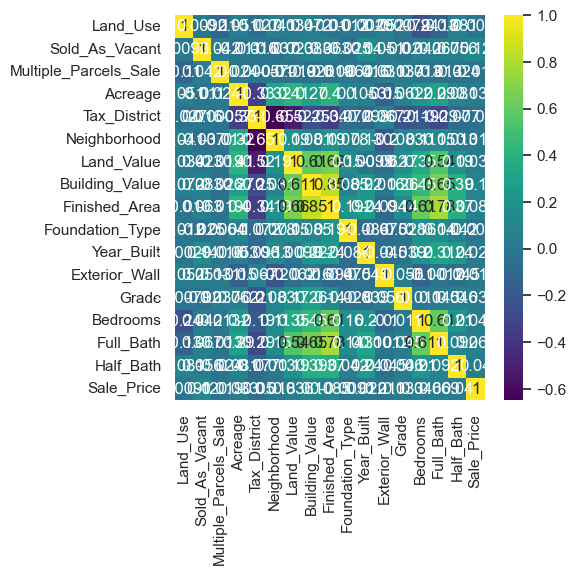

In [48]:
#Correlation Matrix plot
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, 
                annot = True, 
                cmap="viridis")
plt.show()

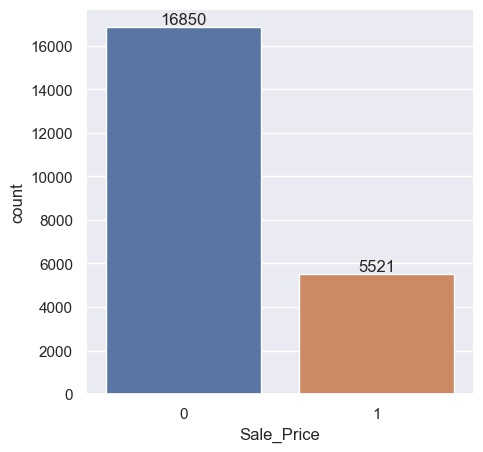

In [49]:
#Sale price barplot
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(x = 'Sale_Price',data = df)
abs_values = df['Sale_Price'].sort_values(ascending = False).value_counts(ascending=False).values
s = ax.bar_label(container=ax.containers[0], labels=abs_values)

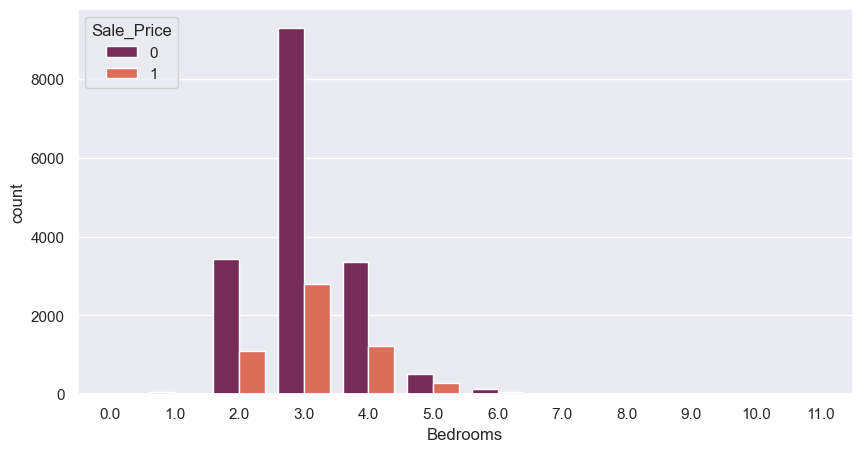

In [50]:
#Count of bedrooms according to sales price
plt.figure(figsize=(10, 5))
sns.countplot(df['Bedrooms'], hue = df['Sale_Price'], palette='rocket')
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print the VIF values
print(vif)


                variables         VIF
0                Land_Use   21.770936
1          Sold_As_Vacant    1.036629
2   Multiple_Parcels_Sale    1.043578
3                 Acreage    2.155338
4            Tax_District   93.779163
5            Neighborhood   10.838375
6              Land_Value    3.539008
7          Building_Value    8.249621
8           Finished_Area   30.336043
9         Foundation_Type    1.519530
10             Year_Built  216.310169
11          Exterior_Wall    1.864718
12                  Grade    6.588283
13               Bedrooms   28.759263
14              Full_Bath   16.396608
15              Half_Bath    1.821366
16             Sale_Price    1.362391


In [57]:
df = df.drop(['Land_Use', 'Tax_District'], axis = 1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [59]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_col)

Index(['Acreage', 'Neighborhood', 'Land_Value', 'Building_Value',
       'Finished_Area', 'Year_Built', 'Bedrooms', 'Full_Bath', 'Half_Bath'],
      dtype='object')


In [60]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
import time
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
y_logr=df[['Sale_Price']]
x_logr=df.drop(['Sale_Price'],axis=1)
start_time = time.time()
x_train, x_test, y_train, y_test = train_test_split(x_logr, y_logr, test_size=0.25, random_state=42)
logistic_regression= LogisticRegression() 
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

In [61]:
df.dtypes

Sold_As_Vacant             int32
Multiple_Parcels_Sale      int32
Acreage                  float64
Neighborhood               int64
Land_Value                 int64
Building_Value             int64
Finished_Area            float64
Foundation_Type            int32
Year_Built                 int64
Exterior_Wall              int32
Grade                      int32
Bedrooms                 float64
Full_Bath                float64
Half_Bath                float64
Sale_Price                 int32
dtype: object

In [62]:
#Checking accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.746647595208296

In [63]:
#Report For Logistc Regression
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(y_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.544633
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Sale_Price   No. Observations:                16778
Model:                          Logit   Df Residuals:                    16763
Method:                           MLE   Df Model:                           14
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                 0.02115
Time:                        21:36:06   Log-Likelihood:                -9137.9
converged:                       True   LL-Null:                       -9335.3
Covariance Type:            nonrobust   LLR p-value:                 1.578e-75
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.4563      1.586      2.180      0.029       0.348       6.

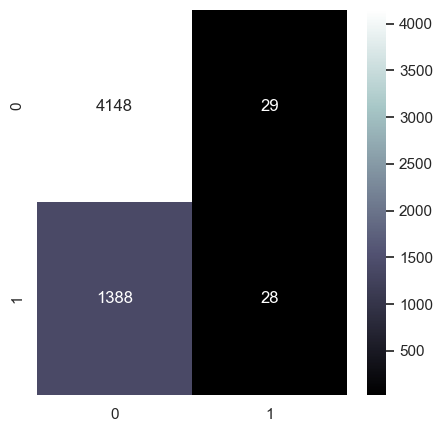

In [64]:
#Confusion Matrix
import matplotlib.pyplot as plt
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
plt.figure(figsize=(5, 5))
y_pred=logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(cnf_matrix, annot=True, fmt='', cmap='bone')
plt.show()

In [65]:
#Multiple benchmarking metrics
print("Logistic Regression Model")
print('Accuracy  '+str(round(accuracy_score(y_test, y_pred)*100,3))+'%')
print('Precision '+str(round(precision_score(y_test, y_pred)*100,3))+'%')
print('Recall    '+str(round(recall_score(y_test, y_pred)*100,3))+'%')
print('MSE       '+str(round(mean_squared_error(y_test, y_pred)*100,3))+'%')
print('ROC_AUC   '+str(round(roc_auc_score(y_test,y_pred)*100,3))+'%')

Logistic Regression Model
Accuracy  74.665%
Precision 49.123%
Recall    1.977%
MSE       25.335%
ROC_AUC   50.642%


In [66]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
svm_model.fit(x_train, y_train)

SVC()

In [67]:
#Predict the response for test dataset
y_predict = svm_model.predict(x_test)

In [68]:
svm_model.score(x_test, y_test)*100

74.55748256749509

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [70]:
#Decision Tree

dt_model = DecisionTreeClassifier(criterion="gini", random_state=45,max_depth=4, min_samples_leaf=5)   
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=45)

In [71]:
#Accuracy of Decision Tree
y_pred = dt_model.predict(x_test)
accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Accuracy of the model:  74.92 %


In [72]:
# Visualize the decision tree
plt.figure(figsize=(15, 12))
plot_tree(dt_model,  filled=True)
plt.show()

SyntaxError: invalid non-printable character U+00A0 (3768512479.py, line 3)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
imp = dt_model.feature_importances_
imp_1 = pd.Series(imp, index=x_logr.columns.values)
imp_1.sort_values()[-5:].plot(kind='barh')
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
dec_conf = confusion_matrix(y_test, y_pred)
sb.heatmap(dec_conf, annot=True, fmt='', cmap='bone')
plt.show()

In [ ]:
#Multiple benchmarking metrics
print("Decision Tree Model")
print('Accuracy  '+str(round(accuracy_score(y_test, dt_model.predict(x_test))*100,3))+'%')
print('Precision '+str(round(precision_score(y_test, dt_model.predict(x_test))*100,3))+'%')
print('Recall    '+str(round(recall_score(y_test, dt_model.predict(x_test))*100,3))+'%')
print('MSE       '+str(round(mean_squared_error(y_test, dt_model.predict(x_test))*100,3))+'%')
print('ROC_AUC   '+str(round(roc_auc_score(y_test,dt_model.predict(x_test))*100,3))+'%')

In [ ]:
#Random Forest Classification
rf_mod = RandomForestClassifier(random_state=45,max_depth=4)   
rf_mod.fit(x_train,y_train)

In [ ]:
#Accuracy of Random Forest
yrf_predict = rf_mod.predict(x_test)
accuracy_score(y_test,yrf_predict)
print("Accuracy of the model: ",str(round(accuracy_score(y_test, yrf_predict)*100,2)),"%")

In [ ]:
plt.figure(figsize=(5, 5))
imp_rf = rf_mod.feature_importances_
imp_rf2 = pd.Series(imp_rf,
                 index=x_logr.columns.values)
imp_rf2.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
#Confusion Matrix for Random Forest
rf = confusion_matrix(y_test, yrf_predict)
plt.figure(figsize=(5, 5))
sb.heatmap(rf, annot=True, fmt='', cmap='bone')
plt.show()

In [ ]:
#Multiple benchmarking metrics
print("Random Forest Model")
print('Accuracy  '+str(round(accuracy_score(y_test, rf_mod.predict(x_test))*100,3))+'%')
print('Precision '+str(round(precision_score(y_test, rf_mod.predict(x_test))*100,3))+'%')
print('Recall    '+str(round(recall_score(y_test, rf_mod.predict(x_test))*100,3))+'%')
print('MSE       '+str(round(mean_squared_error(y_test, rf_mod.predict(x_test))*100,3))+'%')
print('ROC_AUC   '+str(round(roc_auc_score(y_test,rf_mod.predict(x_test))*100,3))+'%')

In [ ]:
gb_model = GradientBoostingClassifier(random_state=45,max_depth=4, learning_rate = 0.1)   
gb_model.fit(x_train,y_train)

In [ ]:
#Accuracy for GB
yg_predict = gb_model.predict(x_test)
accuracy_score(y_test,yg_predict)
print("Accuracy of the model: ",str(round(accuracy_score(y_test, yg_predict)*100,2)),"%")

In [ ]:
#Confusion Matrix for boost
rf = confusion_matrix(y_test, yg_predict)
plt.figure(figsize=(5, 5))
sb.heatmap(rf, annot=True, fmt='', cmap='bone')
plt.show()

In [ ]:
#Feature Importance
plt.figure(figsize=(5, 5))
imp_rf = gb_model.feature_importances_
imp_rf1 = pd.Series(imp_rf,
                 index=x_logr.columns.values)
imp_rf1.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
#Multiple Benchmarking metrics
print("Gradient Boost Model")
print('Accuracy  '+str(round(accuracy_score(y_test, gb_model.predict(x_test))*100,3))+'%')
print('Precision '+str(round(precision_score(y_test, gb_model.predict(x_test))*100,3))+'%')
print('Recall    '+str(round(recall_score(y_test, gb_model.predict(x_test))*100,3))+'%')
print('MSE       '+str(round(mean_squared_error(y_test, gb_model.predict(x_test))*100,3))+'%')
print('ROC_AUC   '+str(round(roc_auc_score(y_test,gb_model.predict(x_test))*100,3))+'%')